# Mircrograd from scratch
 micrograd is basically an autograd engine (automatic gradient) implements backpropagation. backpropagation is this algorithm that allows you to efficiently evaluate the gradient of some kind of a loss function with respect to the weights of a neural network and what that allows us to do, we can iteratively tune the weights of that neural network to minimize the loss function and then improve the accuracy of the network

In [144]:
import math
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

## Single Variable: `x`

In [145]:
def f(x): return 3*x**2 - 4*x + 5

In [146]:
f(3.0)

20.0

In [147]:
xs = np.arange(-5, 5, 0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [148]:
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

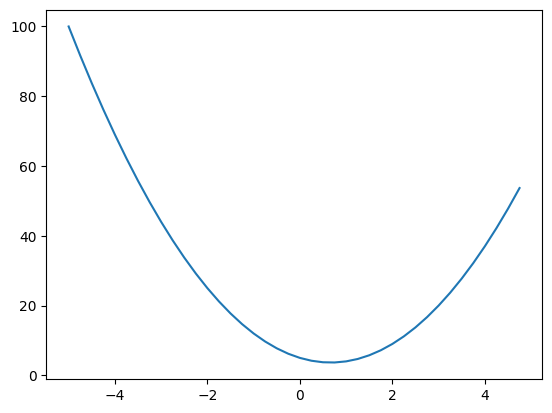

In [149]:
plt.plot(xs, ys)

# Derivative
at some point x that you're interested in and if you slightly bump up, you slightly increase it by small number h how does that function respond to this, does the function go up or does it go down and by how much and that's the slope of that function at that point

Derivative on increasing side of the curve

In [150]:
h = 0.0000000001
x = 3.0
(f(x + h) - f(x))/h

14.000001158365194

### Derivative on the decreasing side of the curve

In [151]:
h = 0.0000000001
x = -3.0
(f(x + h) - f(x))/h

-21.999966293151374

### Derivative on the bottom of the curve

In [152]:
h = 0.0000000001
x = 2/3
(f(x + h) - f(x))/h

0.0

## Multivariable: `a`, `b`, `c`

In [153]:
a = 2.0
b = -3.0
c = 10.0
def d(a, b, c): return a*b + c
print(d(a, b, c))

4.0


### Derivative with respect to `a`

In [154]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


### Derivative with respect to `b`

In [155]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
b += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 4.0002
slope 2.0000000000042206


### Derivative with respect to `c`

In [156]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


## Create Value Object
(mentioned in the README of [micrograd](https://github.com/karpathy/micrograd) )

### Define intial template of Value Class

In [157]:
 class Value:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
      return f"Value(data={self.data})"

In [158]:
a = Value(2.0)
b = Value(-3.0)
a, b

(Value(data=2.0), Value(data=-3.0))

### Add the `add` function


In [159]:
 class Value:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
      return f"Value(data={self.data})"

    def __add__(self, other):
      out = Value(self.data + other.data)
      return out

In [160]:
a = Value(2.0)
b = Value(-3.0)
a, b

(Value(data=2.0), Value(data=-3.0))

In [161]:
a + b # a.__add__(b)

Value(data=-1.0)

### Add the `mul` function

In [162]:
 class Value:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
      return f"Value(data={self.data})"

    def __add__(self, other):
      out = Value(self.data + other.data)
      return out

    def __mul__(self, other):
      out = Value(self.data * other.data)
      return out

In [163]:
a = Value(2.0)
b = Value(-3.0)
a, b

(Value(data=2.0), Value(data=-3.0))

In [164]:
a*b # a.__mul__(b)

Value(data=-6.0)

In [165]:
c = Value(10.0)

In [166]:
d = a * b + c
d

Value(data=4.0)

### Add the functionality to know what values created a value with `_children`

In [167]:
class Value:
    def __init__(self, data, _children=()): #  Add _children
        self.data = data
        self._prev = set(_children) # Add _children

    def __repr__(self):
        return f"Value(data ={self.data})"

    def __add__(self, other):
        return Value(self.data + other.data, (self, other))

    def __mul__(self, other):
        return Value(self.data * other.data, (self, other))

In [168]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a*b + c
d

Value(data =4.0)

In [169]:
d._prev # childrens are -6.0 (a *b) and 10.0 (c)

{Value(data =-6.0), Value(data =10.0)}

### Add the functionality to know what operations created a value with `_op`

In [170]:
class Value:
    def __init__(self, data, _children=(), _op=''): #  Add _op
        self.data = data
        self._prev = set(_children)
        self._op = _op # Add _op

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')

    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')

In [171]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a*b + c
d

Value(data=4.0)

In [172]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [173]:
d._op

'+'

### Visualize the expression graph with operators and operands

In [174]:
from graphviz import Digraph

def trace(root):
    # build a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

In [175]:
def draw_dot(root, label):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label=label(n), shape='record') # ⭠ label function getting called
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

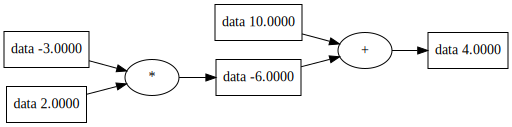

In [176]:
def label(node): return "{data %.4f}" % (node.data)
draw_dot(d, label)

### Add label to each node
> so that we know what are the corresponding variables for each value

In [177]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''): # ⭠ Add label
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label # ⭠ Add label

    def __repr__(self):
        return f"Value(label={self.label} data={self.data})"

    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')

    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')

In [178]:
a = Value(2.0, label = 'a')
b = Value(-3.0, label='b')
c = Value(10, label = 'c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(label=L data=-8.0)

Change the `label` function to render the label

In [179]:
def label(node): return "{%s | {data %.4f}}" % (node.label, node.data)

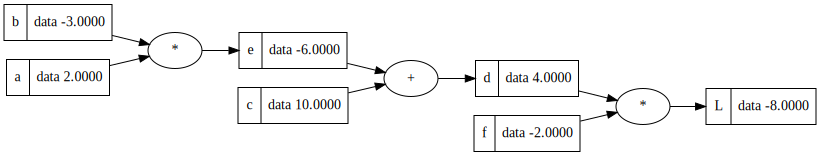

In [180]:
draw_dot(L, label)

### Add `grad` to `Value` class

In [181]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0 # Add grad
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(label={self.label} data={self.data})"

    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')

    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')

In [182]:
a = Value(2.0, label = 'a')
b = Value(-3.0, label='b')
c = Value(10, label = 'c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L.grad

0.0

In [183]:
def label(node): return "{%s | {data %.4f} | grad %.4f}" % (node.label, node.data, node.grad)

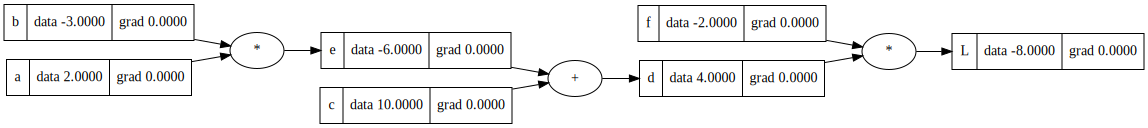

In [184]:
draw_dot(L, label)

### Create a function `lol`
#### Derive with respect to `a`

In [185]:
def lol():

  h = 0.001

  a = Value(2.0, label = 'a')
  b = Value(-3.0, label='b')
  c = Value(10, label = 'c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2.0 + h, label = 'a')
  b = Value(-3.0, label='b')
  c = Value(10, label = 'c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L2 = L.data

  print((L2 - L1)/h)

lol()

6.000000000000227


#### Derive with respect to `L`

In [186]:
def lol():

  h = 0.001

  a = Value(2.0, label = 'a')
  b = Value(-3.0, label='b')
  c = Value(10, label = 'c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2.0, label = 'a')
  b = Value(-3.0, label='b')
  c = Value(10, label = 'c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L2 = L.data + h

  print((L2 - L1)/h)

lol()

1.000000000000334


In [187]:
L.grad = 1.0

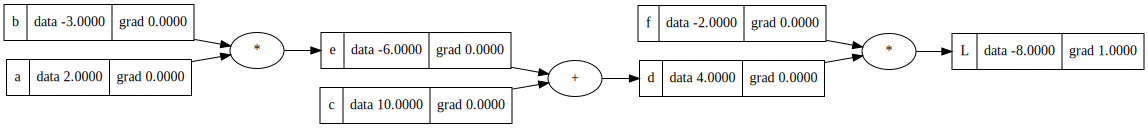

In [188]:
draw_dot(L, label)


#### Derivative of `L` with respect to `f`

$$ L = f \cdot d $$

$$ \frac{\partial L}{\partial f} = \frac{\partial (f \cdot d)}{\partial f} = d = 4.0 $$



In [189]:
def lol():

  h = 0.001

  a = Value(2.0, label = 'a')
  b = Value(-3.0, label='b')
  c = Value(10, label = 'c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2.0, label = 'a')
  b = Value(-3.0, label='b')
  c = Value(10, label = 'c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0 + h, label='f')
  L = d * f; L.label = 'L'
  L2 = L.data

  print((L2 - L1)/h)

lol()

3.9999999999995595


In [190]:
f.grad = 4.0

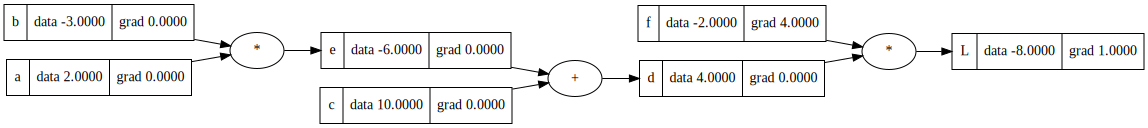

In [191]:
draw_dot(L, label)

#### Derivative of `L` with respect to `d`


$$ \frac{\partial L}{\partial d} = \frac{\partial (f \cdot d)}{\partial d} = f = -2.0 $$


In [192]:
def lol():

  h = 0.001

  a = Value(2.0, label = 'a')
  b = Value(-3.0, label='b')
  c = Value(10, label = 'c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2.0, label = 'a')
  b = Value(-3.0, label='b')
  c = Value(10, label = 'c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  d.data += h
  L = d * f; L.label = 'L'
  L2 = L.data

  print((L2 - L1)/h)

lol()

-2.000000000000668


In [193]:
d.grad = -2.0

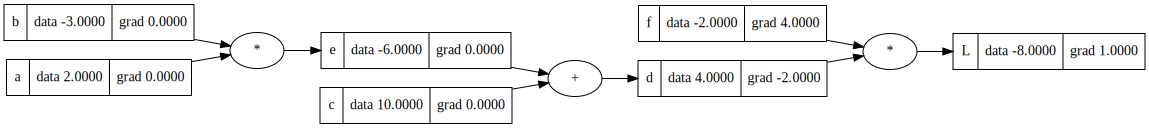

In [194]:
draw_dot(L, label)

#### Derivative of `L` with respect to `c`

$$ \frac{\partial d}{\partial c} = \frac{\partial (c + e)}{\partial c} = 1.0 $$

$$ \frac{\partial L}{\partial c} = \frac{\partial L}{\partial d}\cdot\frac{\partial d}{\partial c} = f = -2.0 $$

In [195]:
def lol():

  h = 0.001

  a = Value(2.0, label = 'a')
  b = Value(-3.0, label='b')
  c = Value(10, label = 'c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2.0, label = 'a')
  b = Value(-3.0, label='b')
  c = Value(10 + h, label = 'c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L2 = L.data

  print((L2 - L1)/h)

lol()

-1.9999999999988916


In [196]:
c.grad = -2

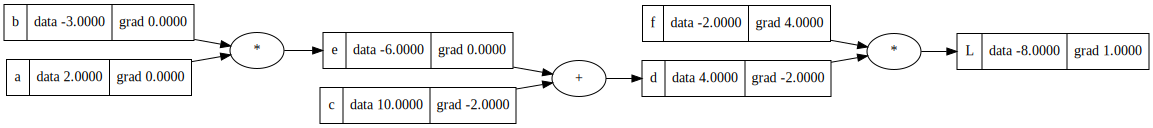

In [197]:
draw_dot(L, label)

#### Derivative of `L` with respect to `e`

$$ \frac{\partial d}{\partial e} = \frac{\partial (c + e)}{\partial e} = 1.0 $$

$$ \frac{\partial L}{\partial e} = \frac{\partial L}{\partial d} \cdot \frac{\partial d}{\partial e} = f = -2.0 $$

In [198]:
def lol():

  h = 0.001

  a = Value(2.0, label = 'a')
  b = Value(-3.0, label='b')
  c = Value(10, label = 'c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2.0, label = 'a')
  b = Value(-3.0, label='b')
  c = Value(10, label = 'c')
  e = a*b; e.label = 'e'
  e.data += h
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L2 = L.data

  print((L2 - L1)/h)

lol()

-2.000000000000668


In [199]:
e.grad = -2.0

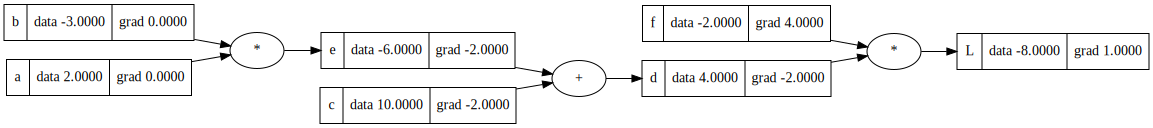

In [200]:
draw_dot(L, label)

#### Derivative of `L` with respect to `a`

$$ \frac{\partial e}{\partial a} = \frac{\partial ({a}\cdot{bMB})}{\partial a} = b $$

$$ \frac{\partial L}{\partial a} = \frac{\partial L}{\partial e} \cdot \frac{\partial e}{\partial a} = -2b = 6 $$

In [201]:
def lol():

  h = 0.001

  a = Value(2.0, label = 'a')
  b = Value(-3.0, label='b')
  c = Value(10, label = 'c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2.0 + h, label = 'a')
  b = Value(-3.0, label='b')
  c = Value(10, label = 'c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L2 = L.data

  print((L2 - L1)/h)

lol()

6.000000000000227


In [202]:
a.grad = 6.0

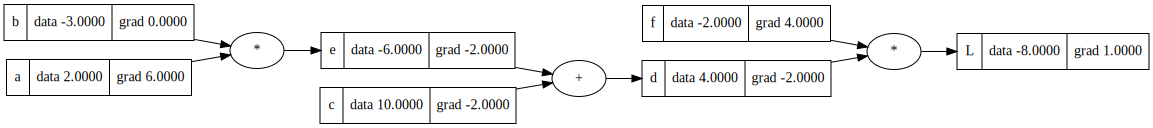

In [203]:
draw_dot(L, label)

#### Derivative of `L` with respect to `b`

$$ \frac{\partial e}{\partial b} = \frac{\partial ({a}\cdot{b})}{\partial b} = a $$

$$ \frac{\partial L}{\partial b} = \frac{\partial L}{\partial e} \cdot \frac{\partial e}{\partial b}= -2a = -4 $$

In [204]:
def lol():

  h = 0.001

  a = Value(2.0, label = 'a')
  b = Value(-3.0, label='b')
  c = Value(10, label = 'c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2.0, label = 'a')
  b = Value(-3.0 + h, label='b')
  c = Value(10, label = 'c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L2 = L.data

  print((L2 - L1)/h)

lol()

-3.9999999999995595


In [205]:
b.grad = -4.0

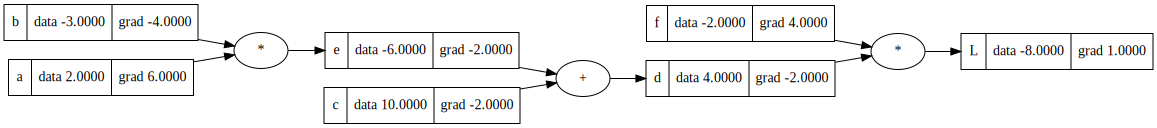

In [206]:
draw_dot(L, label)

In [207]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

In [208]:
e = a * b
d = e + c
L = d * f
print(L.data)

-7.286496


## Neural Network

### Tanh

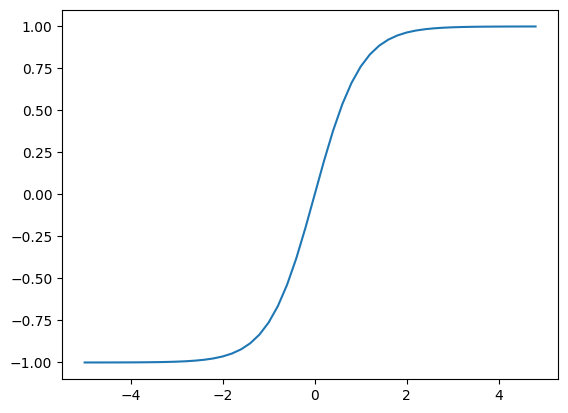

In [209]:
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2)))

In [210]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0 # ⭠ Add grad
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(label={self.label} data={self.data})"

    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')

    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self,), 'tanh')
        return out

### Inputs: x1, x2

In [211]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

### Weights: w1, w2

In [212]:
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

### Bias

In [213]:
b = Value(6.8813735870195432, label='b')

### x1w1 + x2w2 + b

In [214]:
x1w1 = x1*w1; x1w1.label='x1*w1'
x2w2 = x2*w2; x2w2.label='x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label='n'

In [215]:
o = n.tanh(); o.label = 'o'

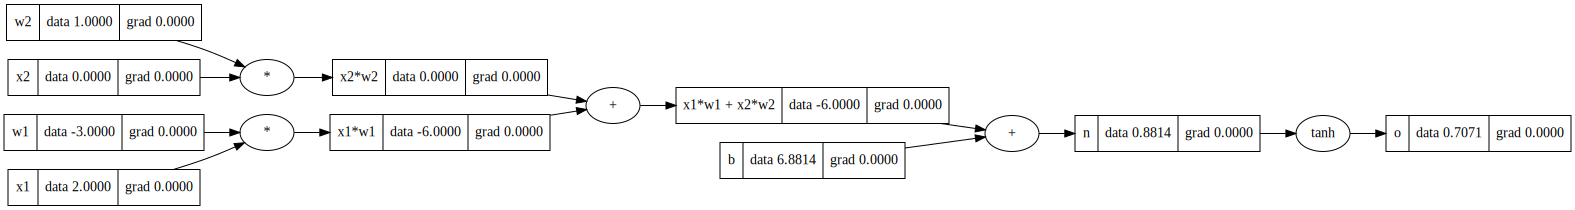

In [216]:
draw_dot(o, label)

### Computing gradient of each node manually

$$ \frac{\partial o}{\partial o} = 1 $$

In [217]:
o.grad = 1.0

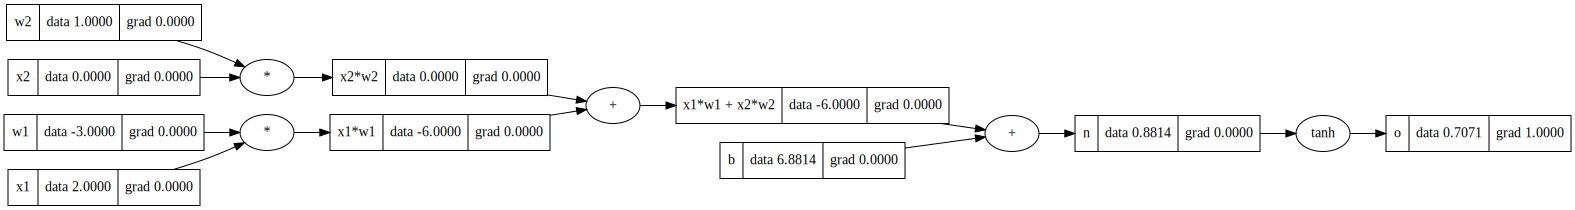

In [218]:
draw_dot(o, label)

$$ o = \tanh(n) $$
$$ \frac{\partial o}{\partial n} = \frac{\partial{\tanh(n)}}{\partial n} = 1 - \tanh(n)^2 = 1 - o^2 $$

In [219]:
n.grad = 1 - (o.data ** 2)

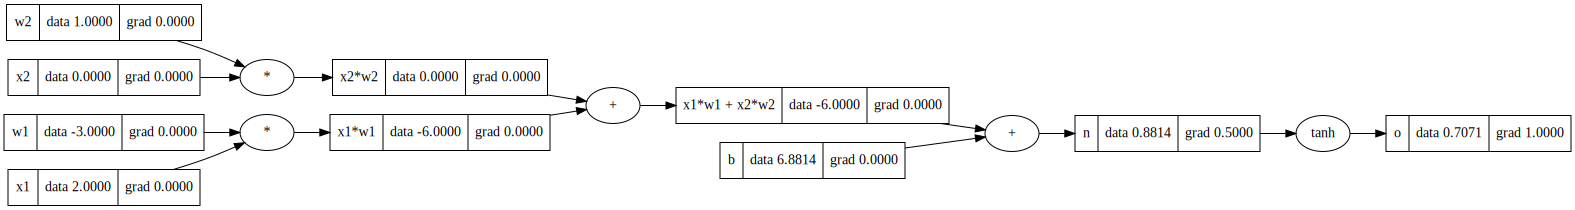

In [220]:
draw_dot(o, label)

> With pluses as we saw the gradient will be same as previous gradient

In [221]:
x1w1x2w2.grad = 0.5
b.grad = 0.5

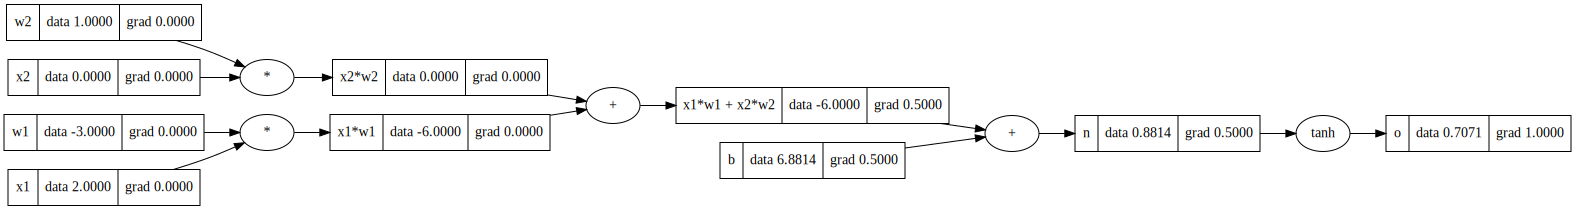

In [222]:
draw_dot(o, label)

In [223]:
x1w1.grad = 0.5
x2w2.grad = 0.5

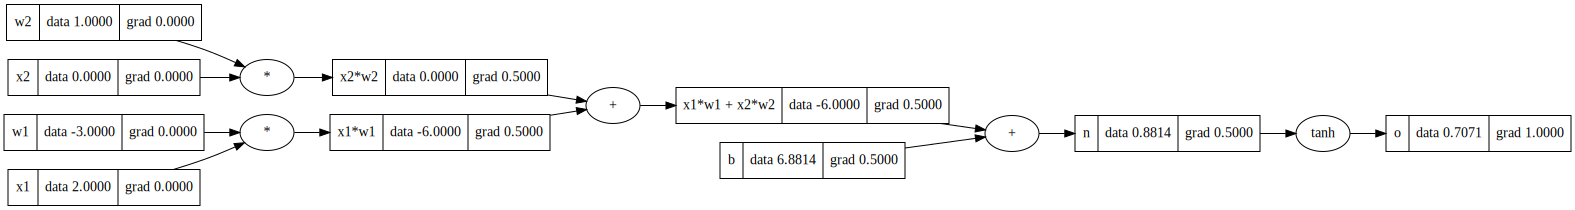

In [224]:
draw_dot(o, label)

In [225]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

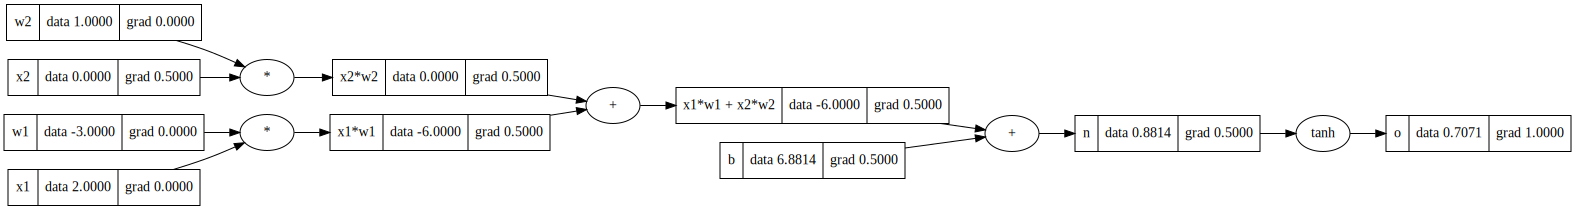

In [226]:
draw_dot(o, label)

In [227]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

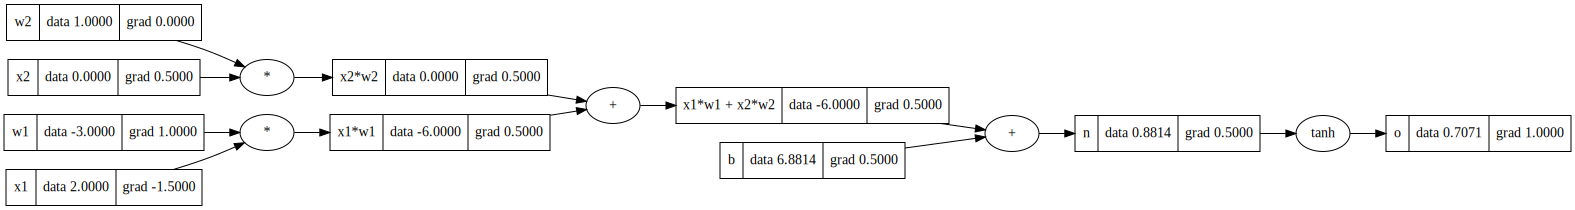

In [228]:
draw_dot(o, label)

### Computing gradient of each node with `_backward()`

In [229]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0 # ⭠ Add grad
        self._backward = lambda : None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(label={self.label} data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self,), 'tanh')

        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward
        return out

> Lets take the NN code from the above

In [230]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1; x1w1.label='x1*w1'
x2w2 = x2*w2; x2w2.label='x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label='n'
o = n.tanh(); o.label = 'o'

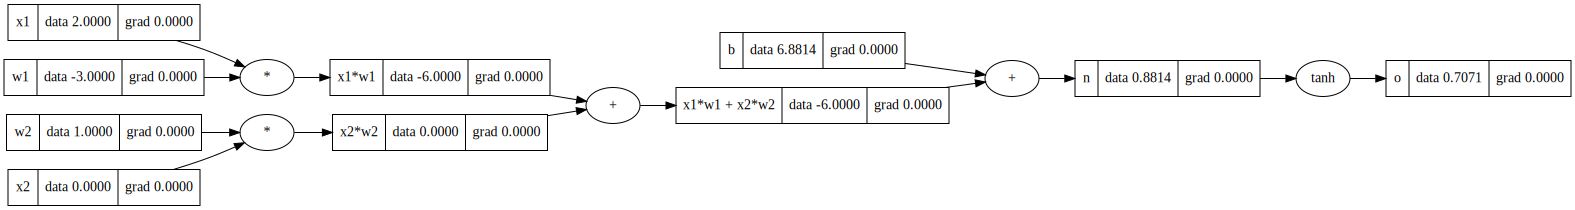

In [231]:
draw_dot(o, label)

#### Backward on `o`

In [232]:
o.grad = 1.0 # setting this to 1 because Value's grad variable is 0
o._backward();  n.grad

0.4999999999999999

#### Backward on `n`

In [233]:
n._backward();
b.grad, x1w1x2w2.grad

(0.4999999999999999, 0.4999999999999999)

#### Backward on `x1w1x2w2`

In [234]:
x1w1x2w2._backward();
x1w1.grad, x2w2.grad

(0.4999999999999999, 0.4999999999999999)

#### Backward on `x2w2`

In [235]:
x2w2._backward()
x2.grad, w2.grad

(0.4999999999999999, 0.0)

#### Backward on `x1w1`

In [236]:
x1w1._backward()
x1.grad, w1.grad

(-1.4999999999999996, 0.9999999999999998)

> Draw the computation graph

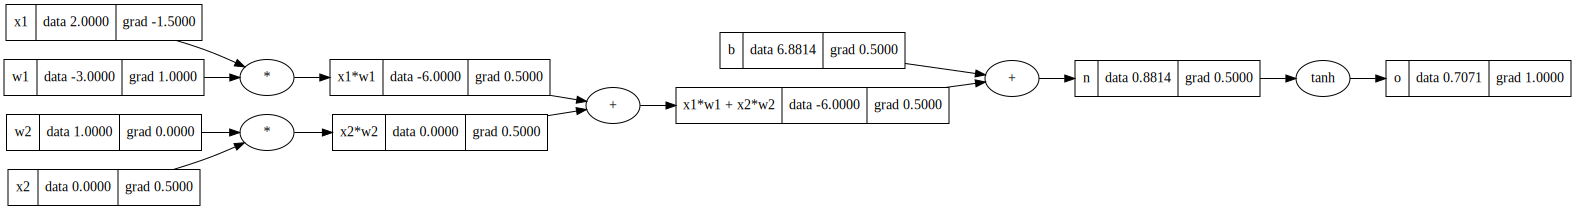

In [237]:
draw_dot(o, label)

### Backward propogation with one call

In [238]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1; x1w1.label='x1*w1'
x2w2 = x2*w2; x2w2.label='x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label='n'
o = n.tanh(); o.label = 'o'

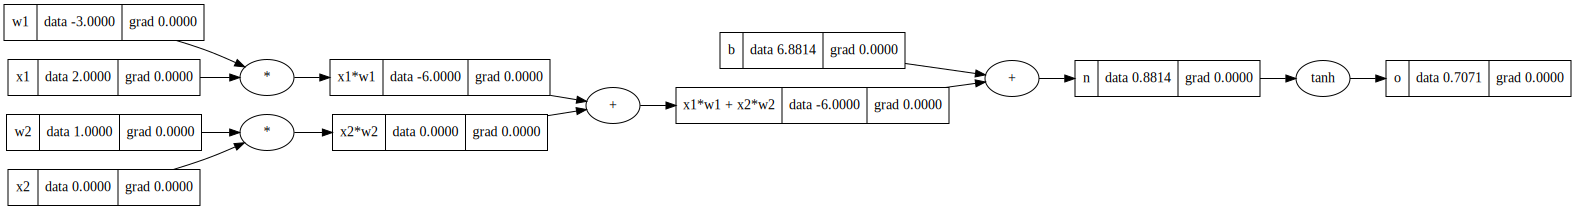

In [239]:
draw_dot(o, label)

#### Topological sort

In [240]:
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo

[Value(label=b data=6.881373587019543),
 Value(label=w2 data=1.0),
 Value(label=x2 data=0.0),
 Value(label=x2*w2 data=0.0),
 Value(label=x1 data=2.0),
 Value(label=w1 data=-3.0),
 Value(label=x1*w1 data=-6.0),
 Value(label=x1*w1 + x2*w2 data=-6.0),
 Value(label=n data=0.8813735870195432),
 Value(label=o data=0.7071067811865476)]

#### Apply `backward` in reverse order of topological order of the computation graph

In [241]:
o.grad = 1.0
for node in reversed(topo):
    node._backward()

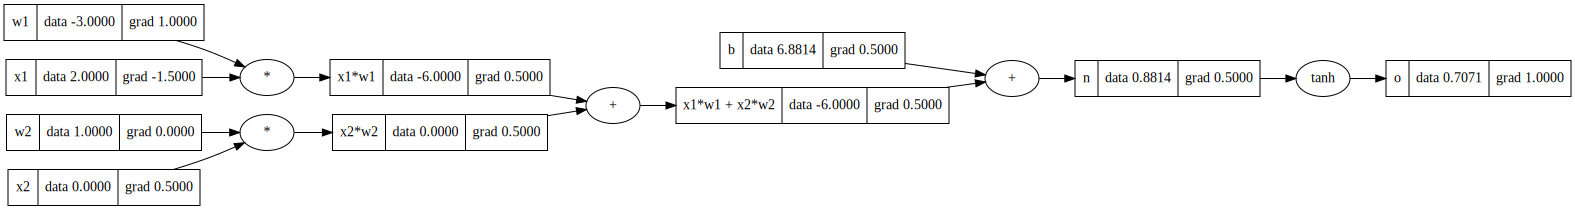

In [242]:
draw_dot(o, label)

#### Add `backward` to `Value`

In [243]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0 # ⭠ Add grad
        self._backward = lambda : None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(label={self.label} data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self,), 'tanh')

        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward
        return out

    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [244]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1; x1w1.label='x1*w1'
x2w2 = x2*w2; x2w2.label='x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label='n'
o = n.tanh(); o.label = 'o'

In [245]:
o.backward()

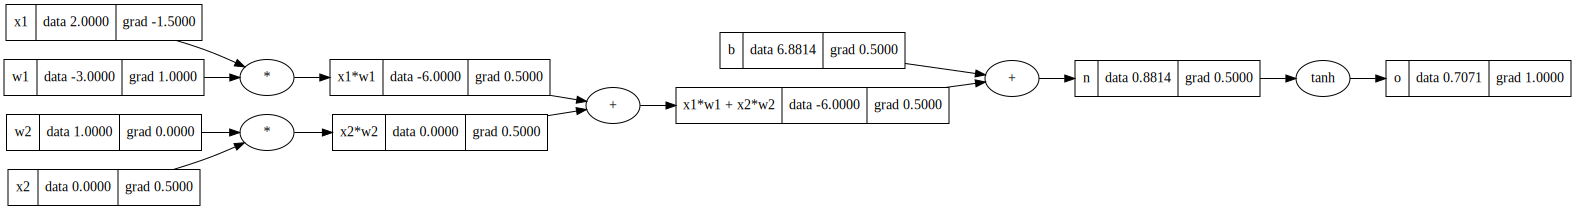

In [246]:
draw_dot(o, label)

### Fixing a backprop bug

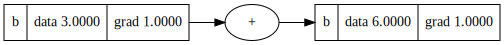

In [247]:
a = Value(3.0, label='b')
b = a + a; b.label = 'b'
b.backward()
draw_dot(b, label)

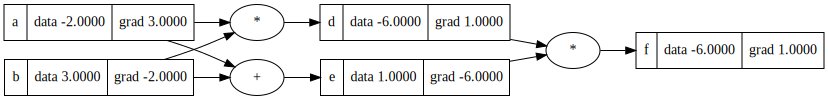

In [248]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a*b; d.label = 'd'
e = a+b; e.label = 'e'
f = d*e; f.label = 'f'
f.backward()
draw_dot(f, label)

#### Accumulate the gradient

In [249]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0 # ⭠ Add grad
        self._backward = lambda : None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(label={self.label} data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad += 1.0 * out.grad # <- Accumulate the gradient
            other.grad += 1.0 * out.grad # <- Accumulate the gradient
        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad += other.data * out.grad # <- Accumulate the gradient
            other.grad += self.data * out.grad # <- Accumulate the gradient
        out._backward = _backward
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self,), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad # <- Accumulate the gradient
        out._backward = _backward
        return out

    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

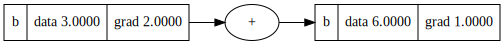

In [250]:
a = Value(3.0, label='b')
b = a + a; b.label = 'b'
b.backward()
draw_dot(b, label)

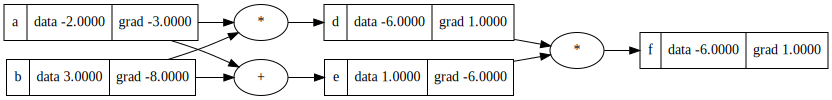

In [251]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a*b; d.label = 'd'
e = a+b; e.label = 'e'
f = d*e; f.label = 'f'
f.backward()
draw_dot(f, label)

### Add and multiply `Value` object with constant

In [252]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0 # ⭠ Add grad
        self._backward = lambda : None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(label={self.label} data={self.data})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad += 1.0 * out.grad # <- Accumulate the gradient
            other.grad += 1.0 * out.grad # <- Accumulate the gradient
        out._backward = _backward
        return out

    def __radd__(self, other): # other + self
        return self + other

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad += other.data * out.grad # <- Accumulate the gradient
            other.grad += self.data * out.grad # <- Accumulate the gradient
        out._backward = _backward
        return out

    def __rmul__(self, other): # other * self
        return self * other

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self,), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad # <- Accumulate the gradient
        out._backward = _backward
        return out

    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [253]:
a = Value(2.0); a + 1

Value(label= data=3.0)

In [254]:
a = Value(2.0); a * 1

Value(label= data=2.0)

In [255]:
2 * a

Value(label= data=4.0)

In [256]:
2 + a

Value(label= data=4.0)

### Implement `tanh`

In [257]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0 # ⭠ Add grad
        self._backward = lambda : None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(label={self.label} data={self.data})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad += 1.0 * out.grad # <- Accumulate the gradient
            other.grad += 1.0 * out.grad # <- Accumulate the gradient
        out._backward = _backward
        return out

    def __radd__(self, other): # other + self
        return self + other

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad += other.data * out.grad # <- Accumulate the gradient
            other.grad += self.data * out.grad # <- Accumulate the gradient
        out._backward = _backward
        return out

    def __rmul__(self, other): # other * self
        return self * other

    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data ** other, (self,), f'**{other}')

        def _backward():
            self.grad += other * (self.data ** (other - 1)) * out.grad
        out._backward = _backward

        return out


    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self,), 'exp')

        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward
        return out

    def __truediv__(self, other): # self / other
        return self * other**-1

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self,), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad # <- Accumulate the gradient
        out._backward = _backward
        return out

    def __neg__(self): #-self
        return -self

    def __sub__(self, other): # self - other
        return self + (-other)

    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [258]:
a = Value(2.0)

In [259]:
a.exp()

Value(label= data=7.38905609893065)

In [260]:
b = Value(3.0)

In [261]:
a/b

Value(label= data=0.6666666666666666)

In [262]:
a **4

Value(label= data=16.0)

In [263]:
a - 1

Value(label= data=1.0)

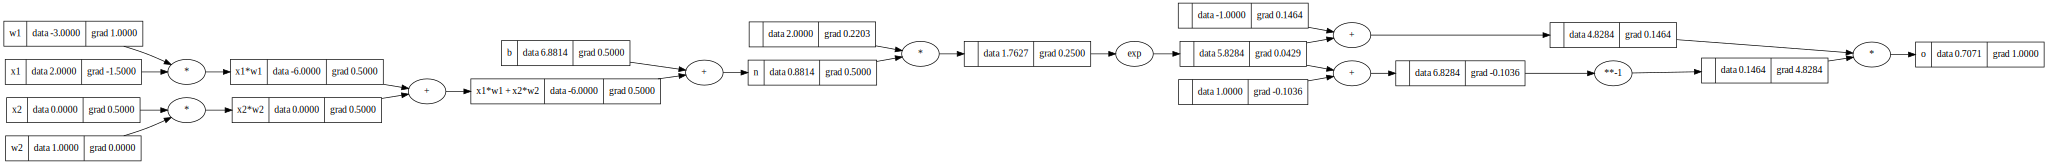

In [264]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1; x1w1.label='x1*w1'
x2w2 = x2*w2; x2w2.label='x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label='n'
# -----
e = (2*n).exp()
o = (e - 1)/(e + 1)
# -----
o.label = 'o'
o.backward()
draw_dot(o, label)

## `x1w1 + x2w2 + b` with PyTorch

In [265]:
import torch

In [266]:
x1 = torch.Tensor([2.0]).double(); x1.requires_grad = True
x2 = torch.Tensor([0.0]).double(); x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double(); w1.requires_grad = True
w2 = torch.Tensor([1.0]).double(); w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]); b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('-----')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())


0.7071066904050358
-----
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [267]:
torch.Tensor([[1, 2, 3], [4, 5, 6]])

tensor([[1., 2., 3.],
        [4., 5., 6.]])

## Neural Network

In [268]:
import random

In [269]:
class Neuron:
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1, 1))

    def __call__(self, x):
        act =  sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
        return act.tanh()

    def parameters(self):
        return self.w + [self.b]

x = [2.0, 3.0]
n = Neuron(2)
n(x)

Value(label= data=-0.9547022535373646)

In [270]:
class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs

    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]

x = [2.0, 3.0]
n = Layer(2, 3)
n(x)


[Value(label= data=-0.9838145661539537),
 Value(label= data=-0.5012680507780342),
 Value(label= data=-0.3498822031960552)]

In [271]:
class MLP:
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i
                       in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)


Value(label= data=0.8272616576037315)

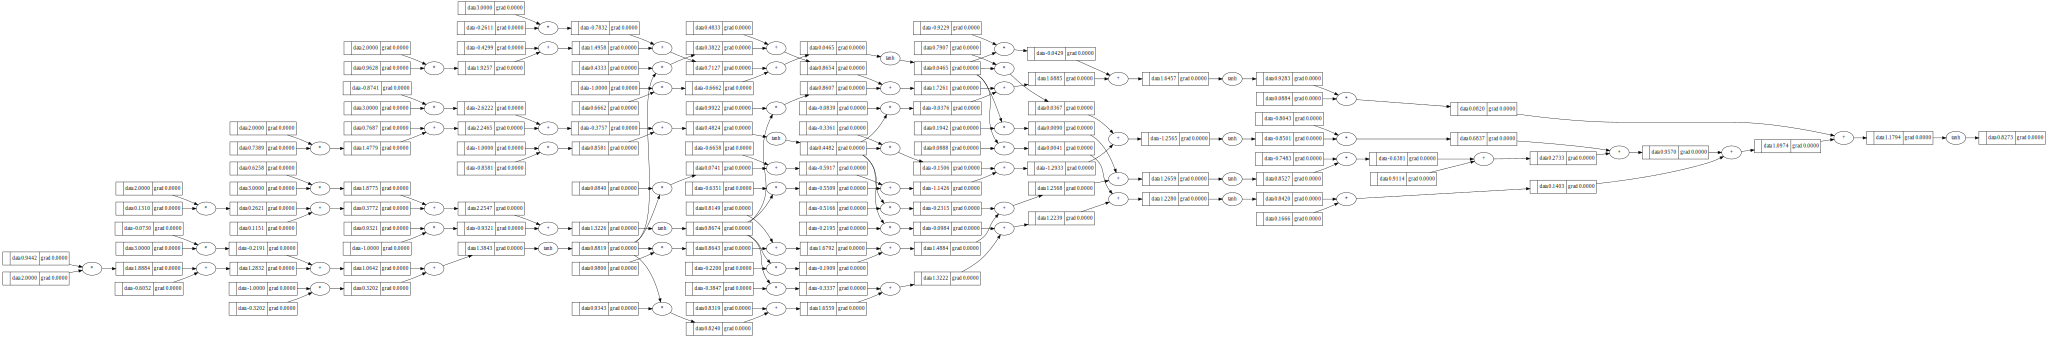

In [272]:
draw_dot(n(x), label)

## Tiny Dataset with loss function

In [273]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]
ys = [1.0, -1.0, -1.0, 1.0]

In [274]:
ypred = [n(x) for x in xs]
loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
loss

Value(label= data=5.954789053822846)

In [275]:
ypred

[Value(label= data=0.8272616576037315),
 Value(label= data=0.5987269289488985),
 Value(label= data=0.8298155375742502),
 Value(label= data=0.85578549312043)]

### Repeat

In [276]:
loss.backward()

In [277]:
n.layers[0].neurons[0].w[0].grad

-0.2212034634754475

In [278]:
for p in n.parameters():
    p.data += -0.01 * p.grad

In [279]:
n.layers[0].neurons[0].w[0].data

0.9464077315158275

In [280]:
ypred = [n(x) for x in xs]
loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
loss

Value(label= data=5.4616050698259855)

In [281]:
ypred

[Value(label= data=0.7905838991449546),
 Value(label= data=0.4695811481741384),
 Value(label= data=0.7967159171227357),
 Value(label= data=0.8271037055988694)]

In [282]:
n.parameters()

[Value(label= data=0.9464077315158275),
 Value(label= data=-0.06960885832052927),
 Value(label= data=-0.31593754801409163),
 Value(label= data=-0.6013033096011158),
 Value(label= data=0.10032494261397887),
 Value(label= data=0.6359143996689209),
 Value(label= data=0.9261848986918615),
 Value(label= data=0.10460161067714292),
 Value(label= data=0.7374671458591787),
 Value(label= data=-0.8769925599297983),
 Value(label= data=-0.8617027566478146),
 Value(label= data=0.7653993330079512),
 Value(label= data=0.9648715094095328),
 Value(label= data=-0.25740678523700633),
 Value(label= data=0.6714144912730995),
 Value(label= data=-0.42548129902015996),
 Value(label= data=0.9798052982705839),
 Value(label= data=-0.21271234063707226),
 Value(label= data=-0.517135740727202),
 Value(label= data=0.20064734039375917),
 Value(label= data=0.8246243008110437),
 Value(label= data=0.09546240460031288),
 Value(label= data=-0.625455128046182),
 Value(label= data=-0.32453704030527625),
 Value(label= data=0.

### Make the above `Repeat` section into `training` loop

In [283]:
def train(repeats, model, xs, ygt, lr = 0.01):

    for k in range(repeats):
        # forward pass
        ypred = [model(x) for x in xs]
        loss = sum((yout - ygt)**2 for ygt, yout in zip(ygt, ypred))
        print(k, loss.data)

        # backward propagation
        for p in n.parameters(): p.grad = 0.0 # zero_grad()
        loss.backward()

        # update: gradient descent
        for p in model.parameters(): p.data += -lr * p.grad
    return ypred

In [284]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]
ys = [1.0, -1.0, -1.0, 1.0]

In [285]:
model = MLP(3, [4, 4, 1])

In [286]:
train(10, model, xs, ys, 0.05)

0 7.910337715204892
1 7.759011746463958
2 7.542657305960585
3 7.1370831272780775
4 6.077403666753207
5 4.257449740025928
6 3.3960655418941013
7 2.1413778401388757
8 2.271990149031126
9 0.061772403685231216


[Value(label= data=0.860054359321644),
 Value(label= data=-0.996241370568794),
 Value(label= data=-0.7967870948496631),
 Value(label= data=0.9703687795473296)]